Processing data and creating dataframes


In [2]:
import pandas as pd
import plotly.express as px
from datetime import date
from statistics import median
import sys

theme_list = ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]
theme = theme_list[2]

current_year = date.today().year
data = []
total_income_in_year_by_country = {}
average_income_in_year_by_country = []
total_income_in_year = [0, 0]
average_income_in_year = 0
total_income_in_year_with_precise_age = {}
average_income_in_year_with_precise_age = {}
max_age = 0
countries = []
average_income_in_year_with_precise_age_list = []
total_and_real = []
average_income_by_age = []
total_income_by_age = {}
median_points_for_average_income_in_year = []
separeted_incomes_by_age = {}
average_income_by_age_list = []
percentage_income_in_year_by_countries = {}
damaged_lines = 0

old_stdout = sys.stdout

with open("data_sets/m.txt", "r") as file, open("outputs.txt","w") as outputs_txt:
    
    sys.stdout = outputs_txt
    
    line = 1
    while line:
        line = file.readline()
        if line:
            try:
                line = eval(line)

                # total income in year
                total_income_in_year[0] += int(line["income_in_year"][:-1])
                total_income_in_year[1] += 1
                # processing dates
                line["date_of_birth"] = current_year - \
                    int(line["date_of_birth"][:4])
                #total and real
                total_and_real.append([line["first_name"], line["last_name"], line["date_of_birth"], int(
                    line["income_in_year"][:-1])*(line["date_of_birth"]-18), int(line["total_property_cost"][:-1])])
                # total income in year by countries
                try:
                    total_income_in_year_by_country[line["country"]][0] += 1
                    total_income_in_year_by_country[line["country"]
                                                    ][1] += int(line["income_in_year"][:-1])
                except:
                    total_income_in_year_by_country[line["country"]] = [
                        1, int(line["income_in_year"][:-1])]
                # max age
                if line["date_of_birth"] > max_age:
                    max_age = line["date_of_birth"]
                # total income in year by country with precise age
                try:
                    total_income_in_year_with_precise_age[line["country"]][int(
                        line["date_of_birth"])][0] += 1
                    total_income_in_year_with_precise_age[line["country"]][int(
                        line["date_of_birth"])][1] += int(line["income_in_year"][:-1])
                except:
                    if not line["country"] in total_income_in_year_with_precise_age:
                        total_income_in_year_with_precise_age[line["country"]] = {
                            int(line["date_of_birth"]): int(line["income_in_year"][:-1])}
                    else:
                        total_income_in_year_with_precise_age[line["country"]][int(
                            line["date_of_birth"])] = [1, int(line["income_in_year"][:-1])]
                # total income by age
                try:
                    total_income_by_age[line["date_of_birth"]
                                        ][1] += int(line["income_in_year"][:-1])
                    total_income_by_age[line["date_of_birth"]][0] += 1
                    separeted_incomes_by_age[line["date_of_birth"]].append(
                        int(line["income_in_year"][:-1]))
                except:
                    total_income_by_age[line["date_of_birth"]] = [
                        1, int(line["income_in_year"][:-1])]
                    separeted_incomes_by_age[line["date_of_birth"]] = [
                        int(line["income_in_year"][:-1])]
                # countries
                if line["country"] not in countries:
                    countries.append(line["country"])
            except Exception as err:
                damaged_lines += 1
                print(f"Can't read line {line}because it is damaged")
                print("Occurred exception: {0}".format(err))
                print("--------------------\n")
            else:
                data.append(line)

    # calculating median for each age
    medianValues = []
    for key in sorted(separeted_incomes_by_age):
        median_points_for_average_income_in_year.append(
            [key, median(separeted_incomes_by_age[key])])
        medianValues.append(median(separeted_incomes_by_age[key]))
    # calculating avg income by countries
    for i, j in total_income_in_year_by_country.items():
        average_income_in_year_by_country.append([i, j[1]/j[0]])

    # calculating avg income by countries
    for i, j in total_income_in_year_with_precise_age.items():
        average_income_in_year_with_precise_age[i] = {}
        for x, k in j.items():
            average_income_in_year_with_precise_age[i][x] = k[1]/k[0]
    # completing losing places
    for i, j in average_income_in_year_with_precise_age.items():
        for x in range(18, max_age+1):
            if not x in j:
                average_income_in_year_with_precise_age[i][x] = 0.0
    # sorting by keys
    average_income_in_year_with_precise_age_copy = average_income_in_year_with_precise_age.copy()
    for i, j in average_income_in_year_with_precise_age_copy.items():
        average_income_in_year_with_precise_age[i] = {
            k: v for k, v in sorted(j.items())}
        average_income_in_year_with_precise_age[i]["countries"] = i
    # creating list
    for i, j in average_income_in_year_with_precise_age.items():
        for x, k in j.items():
            if x != "countries":
                average_income_in_year_with_precise_age_list.append([i, x, k])
    average_income_in_year_with_precise_age_list.remove(
        average_income_in_year_with_precise_age_list[-1])
    for i, j in total_income_by_age.items():
        average_income_by_age.append([i, j[1]/j[0]])
    average_income_by_age = sorted(average_income_by_age, key=lambda x: x[0])
    for i in average_income_by_age:
        average_income_by_age_list.append(i[1])
    # average income by all countries
    average_income_in_year = total_income_in_year[0]/total_income_in_year[1]

    df = pd.DataFrame(data, columns=["id", "first_name", "last_name", "date_of_birth",
                      "country", "married", "job", "income_in_year", "total_property_cost"])
    df.to_csv("csv_tables/stat.csv", index=False)

    df_avg_income_in_year_by_country = pd.DataFrame(
        average_income_in_year_by_country, columns=["countries", "income"])
    df_avg_income_in_year_by_country.to_csv(
        "csv_tables/avg_income_in_year_by_country.csv", index=False)

    df_avg_income_in_year_by_country_with_precise_age = pd.DataFrame.from_dict(
        average_income_in_year_with_precise_age, orient="index")
    df_avg_income_in_year_by_country_with_precise_age.to_csv(
        "csv_tables/avg_income_in_year_by_country_with_precise_age.csv", index=False)

    df_avg_income_in_year_by_country_with_precise_age_from_list = pd.DataFrame(
        average_income_in_year_with_precise_age_list, columns=["countries", "age", "income"])
    df_avg_income_in_year_by_country_with_precise_age_from_list.to_csv(
        "csv_tables/avg_income_in_year_by_country_with_precise_age_from_list.csv", index=False)

    df_avg_income_in_year_by_age = pd.DataFrame(
        average_income_by_age, columns=["Age", "Avg_income"])
    df_avg_income_in_year_by_age.to_csv(
        "csv_tables/abg_income_in_year_by_age.csv", index=False)

    df_median_for_each_age = pd.DataFrame(
        median_points_for_average_income_in_year, columns=["Age", "Median"])
    df_median_for_each_age.to_csv(
        "csv_tables/median_for_each_age.csv", index=False)

    print("Dataframes created successfully ")
    print(f"Damaged lines: {damaged_lines}")

    sys.stdout = old_stdout



Plot: Avg income in year by countries

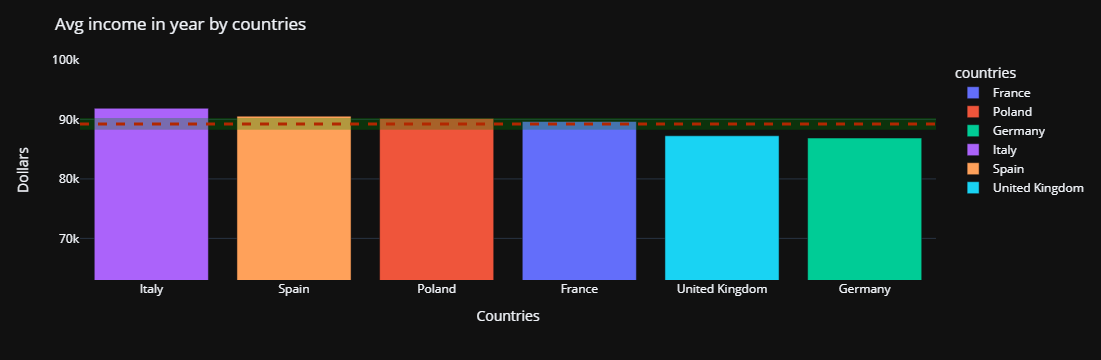

In [3]:

fig = px.bar(df_avg_income_in_year_by_country,x="countries",y="income",color="countries",hover_name="countries",template=theme)
fig.update_layout(
title="Avg income in year by countries",
xaxis_title="Countries",
yaxis_title="Dollars",
yaxis_range=[63000,100000],
# barmode='stack', 
xaxis={'categoryorder':'total descending'}
)

fig.add_hline(y=average_income_in_year, line_width=3, line_dash="dash", line_color="red")
fig.add_hrect(y0=average_income_in_year-1000, y1=average_income_in_year+1000, line_width=0, fillcolor="green", opacity=0.3)
fig.show()


Plot: Avg income in year by countries with precise age

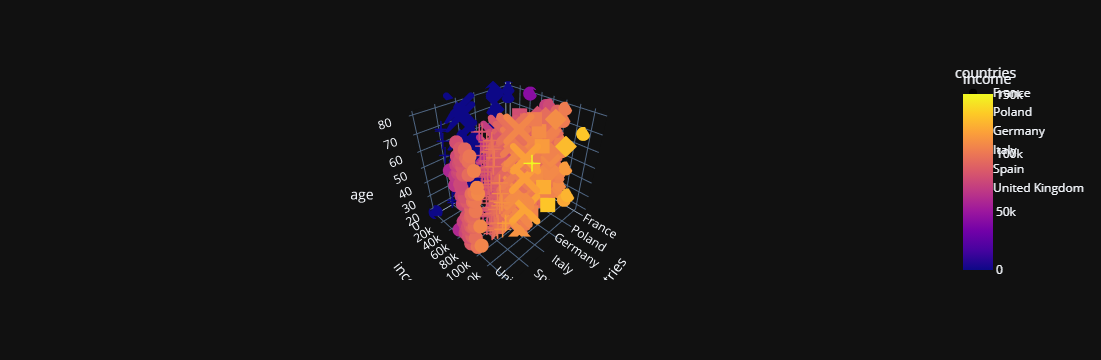

In [4]:

fig = px.bar(df_avg_income_in_year_by_country_with_precise_age_from_list,x="countries",y="income",color="countries",hover_name="countries",
            animation_frame="age",range_y=[30000,120000],template=theme)
fig.update_layout(
title="Avg income in year by countries",
xaxis_title="Countries",
yaxis_title="Dollars",
)
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1650
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 600
fig.show(renderer='notebook_connected')


fig2 = px.scatter(df_avg_income_in_year_by_country_with_precise_age_from_list,x="countries",y="income",color="income",size="income",hover_name="countries",
            animation_frame="age",range_y=[30000,120000],template=theme)
fig2.update_layout(
title="Avg income in year by countries",
xaxis_title="Countries",
yaxis_title="Dollars",
)
fig2.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1650
fig2.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 600
fig2.show(renderer='notebook_connected')


fig3 = px.scatter_3d(df_avg_income_in_year_by_country_with_precise_age_from_list, x='countries', y='income', z='age',
              color='income',symbol='countries',template=theme)
fig3.show()

Catching illegal humans

In [5]:
illegal  = []
total_illegal_money = 0
illegal_people = 0
for i in total_and_real:
    if i[3]<i[4]:
        print(f"{i[0]} {i[1]} - {i[2]} years old has {i[4]-i[3]} extra dollars")
        illegal.append([i[0],i[1],i[2],i[3],i[4],i[4]-i[3]])
        illegal_people+=1
        total_illegal_money+=(i[4]-i[3])
illegal = sorted(illegal, key=lambda x:x[2])
avg_illegal_money = total_illegal_money/illegal_people
df_illegal_people = pd.DataFrame(illegal,columns=["First name","second name","Age","Max possible","Real","Extra"])
df_illegal_people.to_csv("csv_tables/illegal.csv",index=False)

Natalie Hensley - 26 years old has 1135427 extra dollars
Dawn Jones - 41 years old has 40395 extra dollars
Susan Turner - 22 years old has 782108 extra dollars
Brandon Collins - 24 years old has 1298556 extra dollars
Zachary Bryant - 29 years old has 349672 extra dollars
Robert Galloway - 20 years old has 1120948 extra dollars
Lauren Young - 56 years old has 1156988 extra dollars
Adam Le - 26 years old has 535876 extra dollars
Manuel Mccoy - 21 years old has 1455724 extra dollars
James Dean - 36 years old has 466668 extra dollars
James Anderson - 25 years old has 1308537 extra dollars
Connor Ball - 31 years old has 844315 extra dollars
Marcus White - 24 years old has 1129398 extra dollars
Allen Jones - 33 years old has 870657 extra dollars
Amanda Hall - 32 years old has 770343 extra dollars
Amy Black - 27 years old has 943306 extra dollars
Jose Boyd - 32 years old has 1153798 extra dollars
Steven Lucero - 22 years old has 1488220 extra dollars
Sandy Mercado - 22 years old has 2126061 e

Plot: Illegal by age

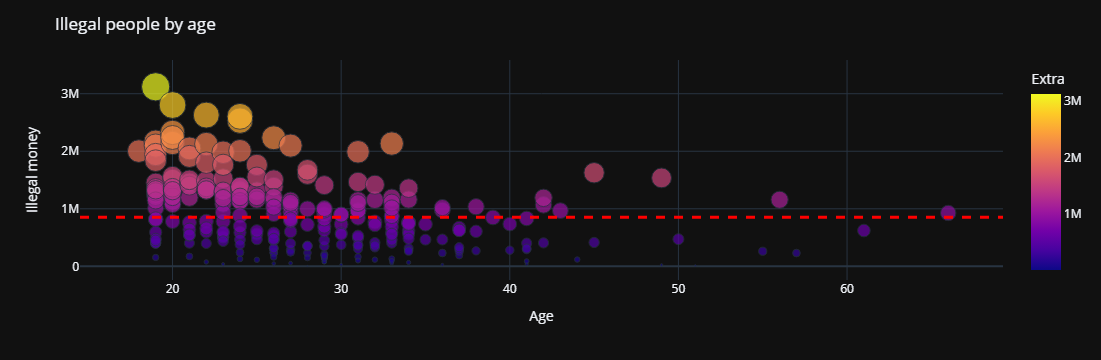

In [6]:

fig = px.scatter(df_illegal_people,x="Age",y="Extra",size="Extra",color="Extra",template=theme)
fig.update_layout(
title="Illegal people by age",
xaxis_title="Age",
yaxis_title="Illegal money",
)
fig.add_hline(y=avg_illegal_money, line_width=3, line_dash="dash", line_color="red")
fig.show()


Plot: Avg income in year by age

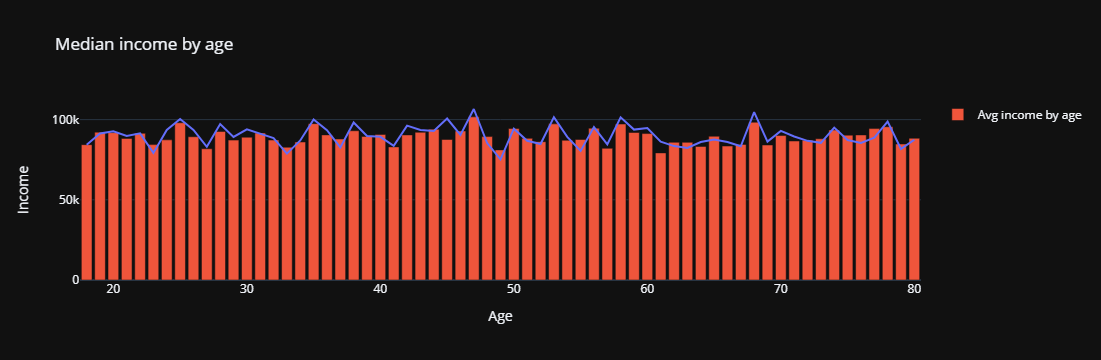

In [7]:

fig = px.line(x=[i for i in range(18,81)],y=medianValues,title="Median income by age",template=theme)
fig.update_layout(
title="Median income by age",
xaxis_title="Age",
yaxis_title="Income",
)
fig.add_bar(x=[i for i in range(18,81)],y=average_income_by_age_list,name="Avg income by age")
fig.show()

In [8]:
my_dict = {}
for line in data:
    try:
        my_dict[line["country"]][1][(round(int(line["income_in_year"][:-1])/10000)*10000)] += 1 
        my_dict[line["country"]][0] += 1
    except :
        try:
            my_dict[line["country"]][0]+=1
            my_dict[line["country"]][1][(round(int(line["income_in_year"][:-1])/10000)*10000)] = 1
        except:
            my_dict[line["country"]] = [1,{(round(int(line["income_in_year"][:-1])/10000)*10000):1}]
#sorting
for f in my_dict.keys():
    my_dict[f][1] = dict(sorted(my_dict[f][1].items()))
# print(my_dict)

render_data = {}
for country,lst in my_dict.items():
    percents = []
    for i in lst[1].values():
        percents.append(i/lst[0]*100)
    render_data[country] = [list(lst[1].keys()),percents]
# print(render_data)



Incomes distribution 

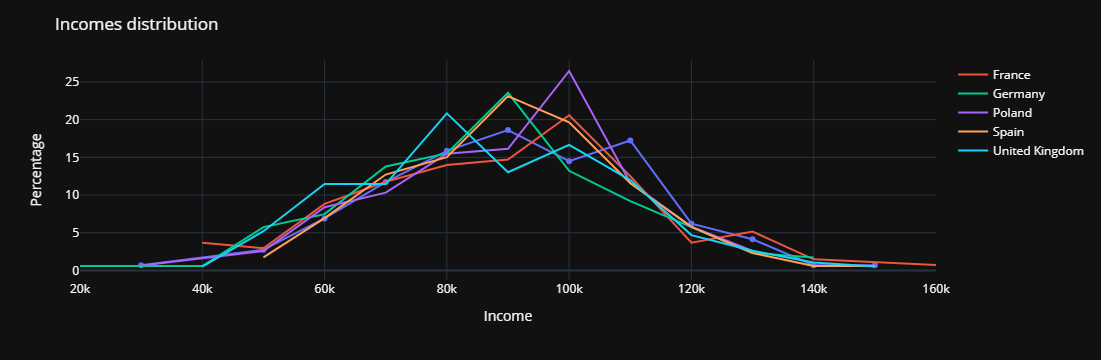

In [9]:
fig = px.line(x=render_data["Italy"][0],y=render_data["Italy"][1],markers=1,template=theme)
fig.add_scatter(x=render_data["France"][0],y=render_data["France"][1],mode="lines",name="France")
fig.add_scatter(x=render_data["Germany"][0],y=render_data["Germany"][1],mode="lines",name="Germany")
fig.add_scatter(x=render_data["Poland"][0],y=render_data["Poland"][1],mode="lines",name="Poland")
fig.add_scatter(x=render_data["Spain"][0],y=render_data["Spain"][1],mode="lines",name="Spain")
fig.add_scatter(x=render_data["United Kingdom"][0],y=render_data["United Kingdom"][1],mode="lines",name="United Kingdom")
fig.update_layout(
title="Incomes distribution ",
xaxis_title="Income",
yaxis_title="Percentage",
)
fig.show()

Plot: Median as Moses wanted 

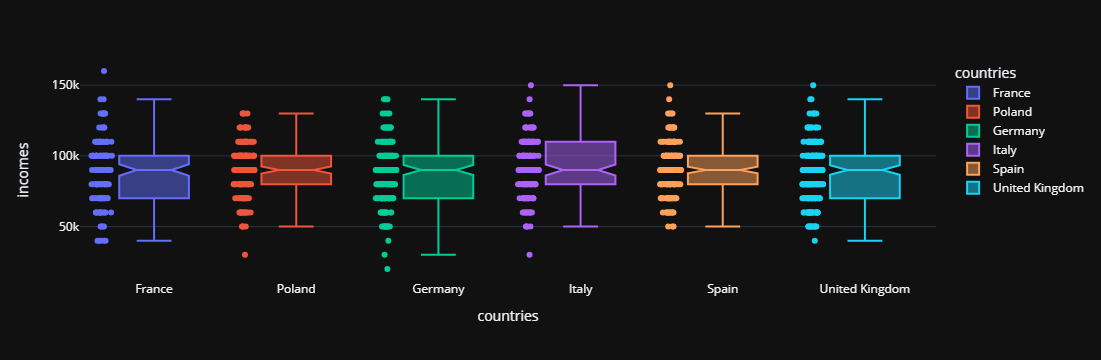

In [10]:
render_data = {"countries":[],"incomes":[]}
for line in data:
    render_data["countries"].append(line["country"])
    render_data["incomes"].append(round(int(line["income_in_year"][:-1])/10000)*10000) 

render_data = pd.DataFrame.from_dict(render_data)
render_data.to_csv("csv_tables/income_by_countries.csv")

fig = px.box(render_data,x="countries",y="incomes",points="all",notched=True,color="countries",template=theme)
fig.show()

Male - female distribution

Preparing data

In [9]:
from genders import getGenders
malefemaleincomes = {"male":[0,0],"female":[0,0]}
string = "https://api.genderize.io/?name[]=peter&name[]=lois&name[]=stevie"
names = []
nms = []
incms = []
for row in data:
    name = row["first_name"]
    nms.append(name)
    incms.append(int(row["income_in_year"][:-1]))#                                   limit is about 990 per day 
    if len(nms) == 10:
        names.append([nms,incms])
        nms = []
        incms = []
names.append([nms,incms])
print(getGenders(*names[0]))
for i in names:
    print(malefemaleincomes)
    data_piece = getGenders(*i)
    for j in data_piece:
        malefemaleincomes[j[1]][0] += 1
        malefemaleincomes[j[1]][1] += j[2] 

render_data = {"male":(malefemaleincomes["male"][1] / malefemaleincomes["male"][0]) / average_income_in_year * 100,"female":(malefemaleincomes["female"][1] / malefemaleincomes["female"][0]) / average_income_in_year * 100}

[('Anthony', 'male', 100826), ('Walter', 'male', 76112), ('Michael', 'male', 88208), ('Natalie', 'female', 123681), ('Dawn', 'female', 73610), ('Susan', 'female', 98767), ('Kari', 'female', 85297), ('Jacqueline', 'female', 79360), ('Stephen', 'male', 83287), ('Brandon', 'male', 100402)]
{'male': [0, 0], 'female': [0, 0]}
{'male': [5, 448835], 'female': [5, 460715]}
{'male': [10, 901520], 'female': [10, 896783]}
{'male': [20, 1789319], 'female': [10, 896783]}
{'male': [24, 2163619], 'female': [16, 1460536]}
{'male': [29, 2628049], 'female': [21, 1889728]}


KeyboardInterrupt: 

Plot

In [11]:
fig = px.bar(x=["Male","Female"],y=[render_data["male"],render_data["female"]],color=["Male","Female"],template=theme)
fig.update_layout(
title="Male - Female distribution in percents",
xaxis_title="Sex",
yaxis_title="Percentage",
xaxis={'categoryorder':'total descending'},
yaxis_range=[0,150]
)
fig.add_hline(y=100, line_width=5, line_dash="dash", line_color="green")
# fig.add_hrect(y0=average_income_in_year-1000, y1=average_income_in_year+1000, line_width=0, fillcolor="green", opacity=0.3)

fig.show()

KeyError: 'male'

Gender distribution

In [12]:
from pathlib import Path
text = Path('data_sets/ma2.txt').read_text()
male_num = text.count("_male_")
female_num = text.count("female")
names = ["male","female"]
values = [male_num/(male_num+female_num),female_num/(male_num+female_num)]
fig = px.pie(values=values, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()
print(male_num,female_num)

20294 19804
